## ANX site

In [49]:
import act
import numpy as np
import xarray as xr
import matplotlib.pyplot as plt
%matplotlib inline
act.discovery
# Set your username and token here!
username = 
token =  

# Set the datastream and start/enddates
datastream = 'anxinterpolatedsondeM1.c1'
startdate = '2019-12-01'
enddate = '2020-03-31'

# Use ACT to easily download the data.  Watch for the data citation!  Show some support
# for ARM's instrument experts and cite their data if you use it in a publication
result = act.discovery.download_arm_data(username, token, datastream, startdate, enddate)

[DOWNLOADING] anxinterpolatedsondeM1.c1.20200124.000030.nc
[DOWNLOADING] anxinterpolatedsondeM1.c1.20200125.000030.nc
[DOWNLOADING] anxinterpolatedsondeM1.c1.20200126.000030.nc
[DOWNLOADING] anxinterpolatedsondeM1.c1.20200122.000030.nc
[DOWNLOADING] anxinterpolatedsondeM1.c1.20200123.000030.nc
[DOWNLOADING] anxinterpolatedsondeM1.c1.20200127.000030.nc
[DOWNLOADING] anxinterpolatedsondeM1.c1.20200121.000030.nc
[DOWNLOADING] anxinterpolatedsondeM1.c1.20200120.000030.nc
[DOWNLOADING] anxinterpolatedsondeM1.c1.20200128.000030.nc
[DOWNLOADING] anxinterpolatedsondeM1.c1.20200118.000030.nc
[DOWNLOADING] anxinterpolatedsondeM1.c1.20200119.000030.nc
[DOWNLOADING] anxinterpolatedsondeM1.c1.20200129.000030.nc
[DOWNLOADING] anxinterpolatedsondeM1.c1.20200115.000030.nc
[DOWNLOADING] anxinterpolatedsondeM1.c1.20200114.000030.nc
[DOWNLOADING] anxinterpolatedsondeM1.c1.20200130.000030.nc
[DOWNLOADING] anxinterpolatedsondeM1.c1.20200116.000030.nc
[DOWNLOADING] anxinterpolatedsondeM1.c1.20200204.000030.

In [2]:
ds_sonde = act.io.read_arm_netcdf(result)
ds_sonde.clean.cleanup()
ds_sonde

ERROR 1: PROJ: proj_create_from_database: Open of /opt/conda/share/proj failed


<xarray.Dataset> Size: 9GB
Dimensions:            (time: 174240, height: 332)
Coordinates:
  * time               (time) datetime64[ns] 1MB 2019-12-01T00:00:30 ... 2020...
  * height             (height) float32 1kB 0.002 0.022 0.042 ... 39.5 40.0 40.5
Data variables: (12/39)
    base_time          (time) datetime64[ns] 1MB 2019-12-01 ... 2020-03-30
    time_offset        (time) datetime64[ns] 1MB 2019-12-01T00:00:30 ... 2020...
    precip             (time) float32 697kB dask.array<chunksize=(1440,), meta=np.ndarray>
    qc_precip          (time) int32 697kB dask.array<chunksize=(1440,), meta=np.ndarray>
    temp               (time, height) float32 231MB dask.array<chunksize=(1440, 332), meta=np.ndarray>
    qc_temp            (time, height) int32 231MB dask.array<chunksize=(1440, 332), meta=np.ndarray>
    ...                 ...
    qc_rh_scaled       (time, height) int32 231MB dask.array<chunksize=(1440, 332), meta=np.ndarray>
    aqc_rh_scaled      (time, height) int32 231MB dask.array<chunksize=(1440, 332), meta=np.ndarray>
    vapor_source       (time, height) int32 231MB dask.array<chunksize=(1440, 332), meta=np.ndarray>
    lat                (time) float32 697kB 69.14 69.14 69.14 ... 69.14 69.14
    lon                (time) float32 697kB 15.68 15.68 15.68 ... 15.68 15.68
    alt                (time) float32 697kB 2.0 2.0 2.0 2.0 ... 2.0 2.0 2.0 2.0
Attributes: (12/17)
    command_line:          idl -R -n interpolatedsonde -s anx -f M1 -b 201912...
    Conventions:           ARM-1.1
    process_version:       vap-interpolatedsonde-7.0-1.el7
    input_datastreams:     anxgriddedsondeM1.c0 : 3.1 : 20191129.000030-20191...
    dod_version:           interpolatedsonde-c1-4.0
    site_id:               anx
    ...                    ...
    doi:                   10.5439/1095316
    history:               created by user giansiracusa on machine agate at 2...
    _file_dates:           ['20191201', '20191202', '20191203', '20191204', '...
    _file_times:           ['000030', '000030', '000030', '000030', '000030',...
    _datastream:           anxinterpolatedsondeM1.c1
    _arm_standards_flag:   1

In [113]:
ds = ds_sonde[['wspd', 'wdir', 'height', 'bar_pres', 'time', 'potential_temp']]
ds

<xarray.Dataset> Size: 927MB
Dimensions:         (time: 174240, height: 332)
Coordinates:
  * height          (height) float32 1kB 0.002 0.022 0.042 ... 39.5 40.0 40.5
  * time            (time) datetime64[ns] 1MB 2019-12-01T00:00:30 ... 2020-03...
Data variables:
    wspd            (time, height) float32 231MB dask.array<chunksize=(1440, 332), meta=np.ndarray>
    wdir            (time, height) float32 231MB dask.array<chunksize=(1440, 332), meta=np.ndarray>
    bar_pres        (time, height) float32 231MB dask.array<chunksize=(1440, 332), meta=np.ndarray>
    potential_temp  (time, height) float32 231MB dask.array<chunksize=(1440, 332), meta=np.ndarray>
Attributes: (12/17)
    command_line:          idl -R -n interpolatedsonde -s anx -f M1 -b 201912...
    Conventions:           ARM-1.1
    process_version:       vap-interpolatedsonde-7.0-1.el7
    input_datastreams:     anxgriddedsondeM1.c0 : 3.1 : 20191129.000030-20191...
    dod_version:           interpolatedsonde-c1-4.0
    site_id:               anx
    ...                    ...
    doi:                   10.5439/1095316
    history:               created by user giansiracusa on machine agate at 2...
    _file_dates:           ['20191201', '20191202', '20191203', '20191204', '...
    _file_times:           ['000030', '000030', '000030', '000030', '000030',...
    _datastream:           anxinterpolatedsondeM1.c1
    _arm_standards_flag:   1

In [105]:
t = range(0,174240,120) #The 120 is a 2 hour step; can make finer

In [106]:
t_strong_ind = []
t_weak_ind = []
M_weak= []
M_strong= []
wspd = ds.wspd.sel(height= '1', method='nearest')
wdir = ds.wdir.sel(height= '1', method='nearest')
wspd_weak = []
wspd_strong = []
wdir_weak = []
wdir_strong = []
for i in t:
    if not np.isnan(ds['bar_pres'][i,:].values).all(): #checks if all nan
        h = np.nanargmin(np.abs(ds['bar_pres'][i,:].values-85))
        if ds['potential_temp'][i,h] < 273.15:
            t_strong_ind.append(i)
            M_strong.append(ds['potential_temp'][i,h])
            wspd_strong.append(wspd[i])
            wdir_strong.append(wdir[i])
        elif ds['potential_temp'][i,h] < 275.15:
            t_weak_ind.append(i)
            M_weak.append(ds['potential_temp'][i,h])
            wspd_weak.append(wspd[i])
            wdir_weak.append(wdir[i])

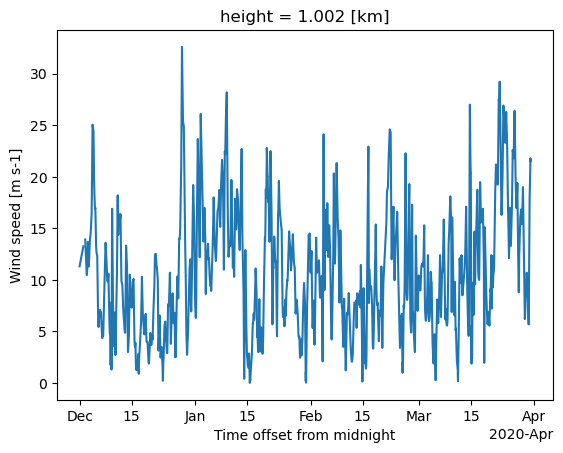

In [64]:
wspd.plot()

In [ ]:
display = act.plotting.DistributionDisplay(ds)

[[4.978741  2.4172053 3.2052433 ...       nan       nan       nan]
 [7.2000036 2.9307494 4.0040326 ...       nan       nan       nan]
 [5.6048107 2.936148  3.9928908 ...       nan       nan       nan]
 ...
 [      nan 3.3951297 4.6297226 ...       nan       nan       nan]
 [      nan 5.150174  6.9267664 ...       nan       nan       nan]
 [      nan 6.68252   8.875431  ...       nan       nan       nan]]


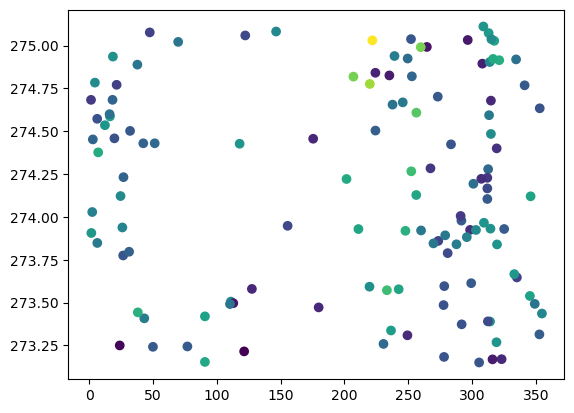

In [84]:
print (weak_wspd)
plt.scatter(np.array(wdir_weak), M_weak, c=wspd_weak)

ValueError: too many values to unpack (expected 2)

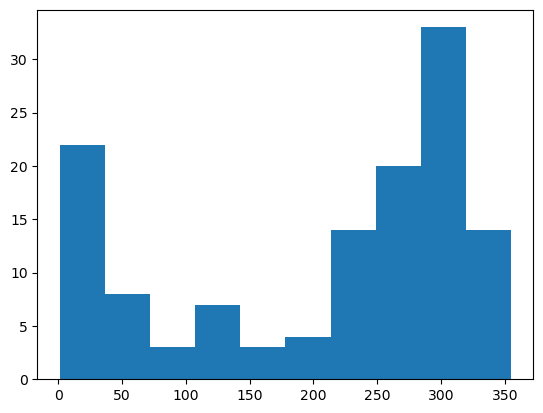

In [102]:
c_weak,bins = plt.hist(wdir_weak)

(array([26.,  4., 10.,  0.,  0.,  1.,  4., 19., 63., 34.]),
 array([  6.29785156,  41.59287262,  76.88789368, 112.18292236,
        147.47793579, 182.77296448, 218.06799316, 253.36300659,
        288.65802002, 323.95306396, 359.24807739]),
 <BarContainer object of 10 artists>)

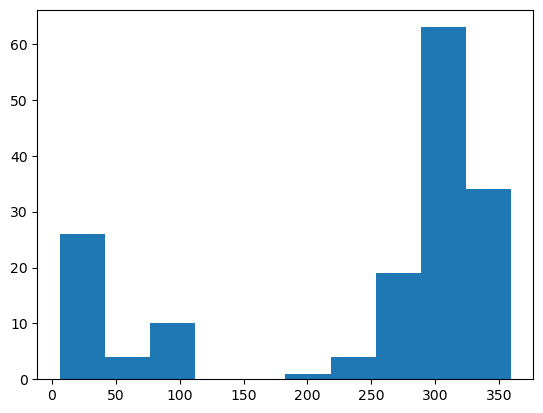

In [89]:
plt.hist(wdir_strong)

(array([10216.,  7717.,  7526.,  7479., 12342., 21871., 42732., 27017.,
        22832., 13767.]),
 array([5.26428223e-03, 3.60039444e+01, 7.20026245e+01, 1.08001305e+02,
        1.43999985e+02, 1.79998657e+02, 2.15997345e+02, 2.51996033e+02,
        2.87994690e+02, 3.23993378e+02, 3.59992065e+02]),
 <BarContainer object of 10 artists>)

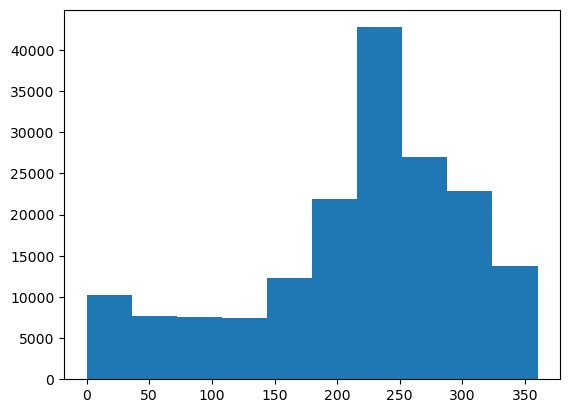

In [90]:
plt.hist(wdir)

In [107]:
ds = xr.Dataset({'wdir_weak': ("event", wdir_weak), 'wspd_weak':('event',wspd_weak)})
ds

<xarray.Dataset> Size: 1kB
Dimensions:    (event: 128)
Dimensions without coordinates: event
Data variables:
    wdir_weak  (event) float32 512B 47.54 21.58 1.516 ... 230.6 211.0 207.1
    wspd_weak  (event) float32 512B 5.001 4.844 4.521 ... 8.114 13.53 17.76

/opt/conda/lib/python3.11/site-packages/act/plotting/plot.py:81: UserWarning: Could not discern datastreamname and dict or tuple were not provided. Using defaultname of act_datastream!
  warnings.warn(


<PolarAxes: title={'center': 'Weak Wind Rose'}>

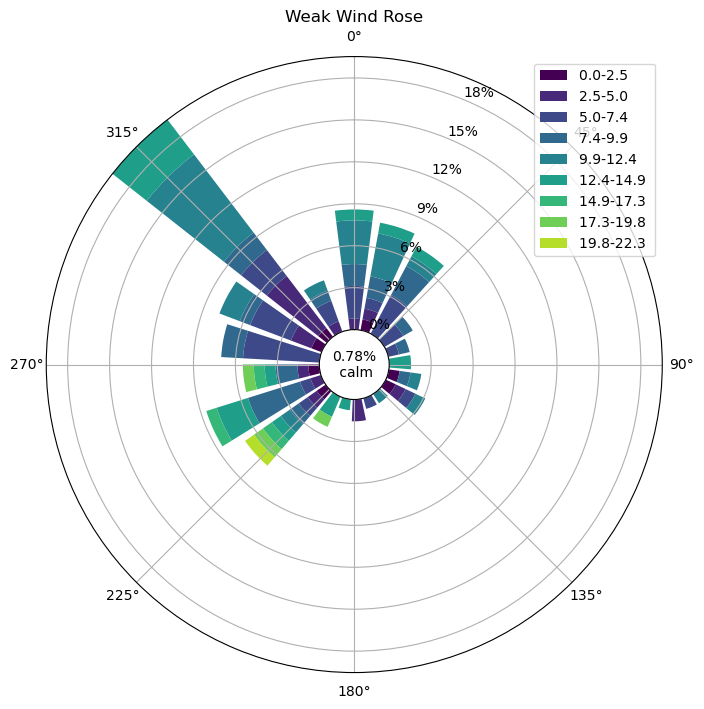

In [110]:
windrose2 = act.plotting.WindRoseDisplay(ds, figsize=(10,8))
windrose2.plot("wdir_weak",'wspd_weak', set_title="Weak Wind Rose")

/opt/conda/lib/python3.11/site-packages/act/plotting/plot.py:81: UserWarning: Could not discern datastreamname and dict or tuple were not provided. Using defaultname of act_datastream!
  warnings.warn(


<PolarAxes: title={'center': 'Strong Wind Rose'}>

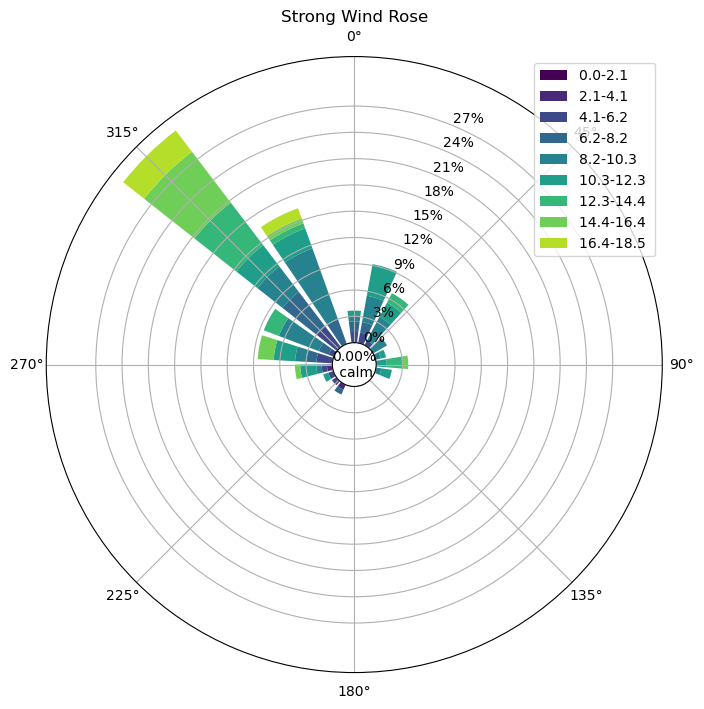

In [111]:
ds = xr.Dataset({'wdir_strong': ("event", wdir_strong), 'wspd_strong':('event',wspd_strong)})
windrose2 = act.plotting.WindRoseDisplay(ds, figsize=(10,8))
windrose2.plot("wdir_strong",'wspd_strong', set_title="Strong Wind Rose")

<PolarAxes: title={'center': 'Total Wind Rose'}>

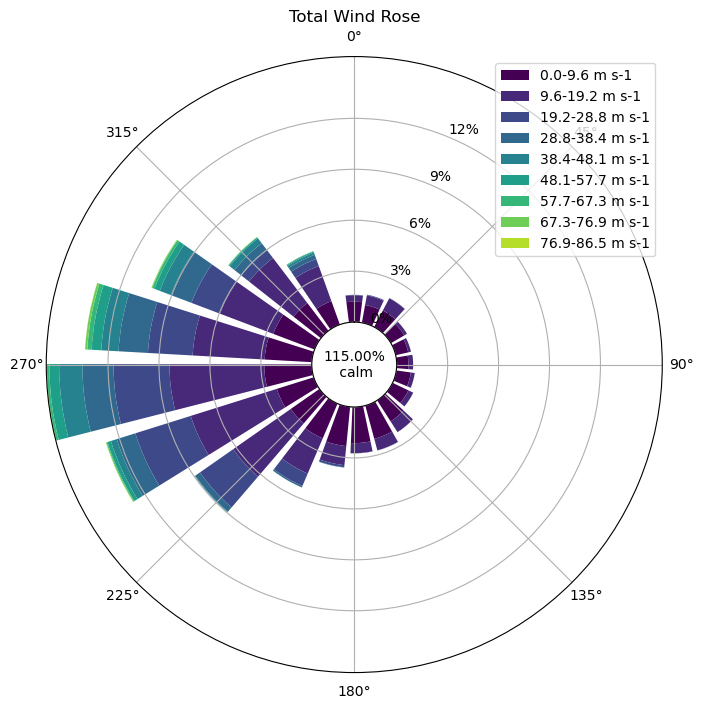

In [116]:
#ds = xr.Dataset({'wdir_total': ("event", wdir), 'wspd_total':('event',wspd)})
windrose2 = act.plotting.WindRoseDisplay(ds, figsize=(10,8))
windrose2.plot("wdir",'wspd', set_title="Total Wind Rose")

## NSA site

In [117]:
datastream = 'nsainterpolatedsondeC1.c1'
startdate = '2020-08-01'
enddate = '2020-10-15'

# Use ACT to easily download the data.  Watch for the data citation!  Show some support
# for ARM's instrument experts and cite their data if you use it in a publication
result = act.discovery.download_arm_data(username, token, datastream, startdate, enddate)

[DOWNLOADING] nsainterpolatedsondeC1.c1.20200902.000030.nc
[DOWNLOADING] nsainterpolatedsondeC1.c1.20200903.000030.nc
[DOWNLOADING] nsainterpolatedsondeC1.c1.20200922.000030.nc
[DOWNLOADING] nsainterpolatedsondeC1.c1.20200920.000030.nc
[DOWNLOADING] nsainterpolatedsondeC1.c1.20200921.000030.nc
[DOWNLOADING] nsainterpolatedsondeC1.c1.20200801.000030.nc
[DOWNLOADING] nsainterpolatedsondeC1.c1.20200804.000030.nc
[DOWNLOADING] nsainterpolatedsondeC1.c1.20200803.000030.nc
[DOWNLOADING] nsainterpolatedsondeC1.c1.20200802.000030.nc
[DOWNLOADING] nsainterpolatedsondeC1.c1.20200805.000030.nc
[DOWNLOADING] nsainterpolatedsondeC1.c1.20200806.000030.nc
[DOWNLOADING] nsainterpolatedsondeC1.c1.20200807.000030.nc
[DOWNLOADING] nsainterpolatedsondeC1.c1.20200808.000030.nc
[DOWNLOADING] nsainterpolatedsondeC1.c1.20200809.000030.nc
[DOWNLOADING] nsainterpolatedsondeC1.c1.20200810.000030.nc
[DOWNLOADING] nsainterpolatedsondeC1.c1.20200811.000030.nc
[DOWNLOADING] nsainterpolatedsondeC1.c1.20200812.000030.

In [118]:
ds_nsa = act.io.read_arm_netcdf(result)
ds_nsa.clean.cleanup()
ds_nsa

<xarray.Dataset> Size: 5GB
Dimensions:            (time: 96480, height: 332)
Coordinates:
  * time               (time) datetime64[ns] 772kB 2020-08-01T00:00:30 ... 20...
  * height             (height) float32 1kB 0.008 0.028 0.048 ... 40.01 40.51
Data variables: (12/39)
    base_time          (time) datetime64[ns] 772kB 2020-08-01 ... 2020-10-06
    time_offset        (time) datetime64[ns] 772kB 2020-08-01T00:00:30 ... 20...
    precip             (time) float32 386kB dask.array<chunksize=(1440,), meta=np.ndarray>
    qc_precip          (time) int32 386kB dask.array<chunksize=(1440,), meta=np.ndarray>
    temp               (time, height) float32 128MB dask.array<chunksize=(1440, 332), meta=np.ndarray>
    qc_temp            (time, height) int32 128MB dask.array<chunksize=(1440, 332), meta=np.ndarray>
    ...                 ...
    qc_rh_scaled       (time, height) int32 128MB dask.array<chunksize=(1440, 332), meta=np.ndarray>
    aqc_rh_scaled      (time, height) int32 128MB dask.array<chunksize=(1440, 332), meta=np.ndarray>
    vapor_source       (time, height) int32 128MB dask.array<chunksize=(1440, 332), meta=np.ndarray>
    lat                (time) float32 386kB 71.32 71.32 71.32 ... 71.32 71.32
    lon                (time) float32 386kB -156.6 -156.6 ... -156.6 -156.6
    alt                (time) float32 386kB 8.0 8.0 8.0 8.0 ... 8.0 8.0 8.0 8.0
Attributes: (12/17)
    command_line:          idl -D 0 -R -n interpolatedsonde -s nsa -f C1 -b 2...
    Conventions:           ARM-1.1
    process_version:       vap-interpolatedsonde-6.6-0.el6
    input_datastreams:     nsagriddedsondeC1.c0 : 3.0 : 20200730.000030-20200...
    dod_version:           interpolatedsonde-c1-4.0
    site_id:               nsa
    ...                    ...
    doi:                   10.5439/1095316
    history:               created by user dsmgr on machine ruby at 2020-08-0...
    _file_dates:           ['20200801', '20200802', '20200803', '20200804', '...
    _file_times:           ['000030', '000030', '000030', '000030', '000030',...
    _datastream:           nsainterpolatedsondeC1.c1
    _arm_standards_flag:   1

In [128]:
ds = ds_nsa[['wspd', 'wdir', 'height', 'bar_pres', 'time', 'potential_temp']]
ds

<xarray.Dataset> Size: 513MB
Dimensions:         (time: 96480, height: 332)
Coordinates:
  * height          (height) float32 1kB 0.008 0.028 0.048 ... 39.51 40.01 40.51
  * time            (time) datetime64[ns] 772kB 2020-08-01T00:00:30 ... 2020-...
Data variables:
    wspd            (time, height) float32 128MB dask.array<chunksize=(1440, 332), meta=np.ndarray>
    wdir            (time, height) float32 128MB dask.array<chunksize=(1440, 332), meta=np.ndarray>
    bar_pres        (time, height) float32 128MB dask.array<chunksize=(1440, 332), meta=np.ndarray>
    potential_temp  (time, height) float32 128MB dask.array<chunksize=(1440, 332), meta=np.ndarray>
Attributes: (12/17)
    command_line:          idl -D 0 -R -n interpolatedsonde -s nsa -f C1 -b 2...
    Conventions:           ARM-1.1
    process_version:       vap-interpolatedsonde-6.6-0.el6
    input_datastreams:     nsagriddedsondeC1.c0 : 3.0 : 20200730.000030-20200...
    dod_version:           interpolatedsonde-c1-4.0
    site_id:               nsa
    ...                    ...
    doi:                   10.5439/1095316
    history:               created by user dsmgr on machine ruby at 2020-08-0...
    _file_dates:           ['20200801', '20200802', '20200803', '20200804', '...
    _file_times:           ['000030', '000030', '000030', '000030', '000030',...
    _datastream:           nsainterpolatedsondeC1.c1
    _arm_standards_flag:   1

In [122]:
t = range(0,96480,120) #The 120 is a 2 hour step; can make finer

In [123]:
t_strong_ind = []
t_weak_ind = []
M_weak= []
M_strong= []
wspd = ds.wspd.sel(height= '1', method='nearest')
wdir = ds.wdir.sel(height= '1', method='nearest')
wspd_weak = []
wspd_strong = []
wdir_weak = []
wdir_strong = []
for i in t:
    if not np.isnan(ds['bar_pres'][i,:].values).all(): #checks if all nan
        h = np.nanargmin(np.abs(ds['bar_pres'][i,:].values-85))
        if ds['potential_temp'][i,h] < 273.15:
            t_strong_ind.append(i)
            M_strong.append(ds['potential_temp'][i,h])
            wspd_strong.append(wspd[i])
            wdir_strong.append(wdir[i])
        elif ds['potential_temp'][i,h] < 275.15:
            t_weak_ind.append(i)
            M_weak.append(ds['potential_temp'][i,h])
            wspd_weak.append(wspd[i])
            wdir_weak.append(wdir[i])

/opt/conda/lib/python3.11/site-packages/act/plotting/plot.py:81: UserWarning: Could not discern datastreamname and dict or tuple were not provided. Using defaultname of act_datastream!
  warnings.warn(


<PolarAxes: title={'center': 'Weak Wind Rose'}>

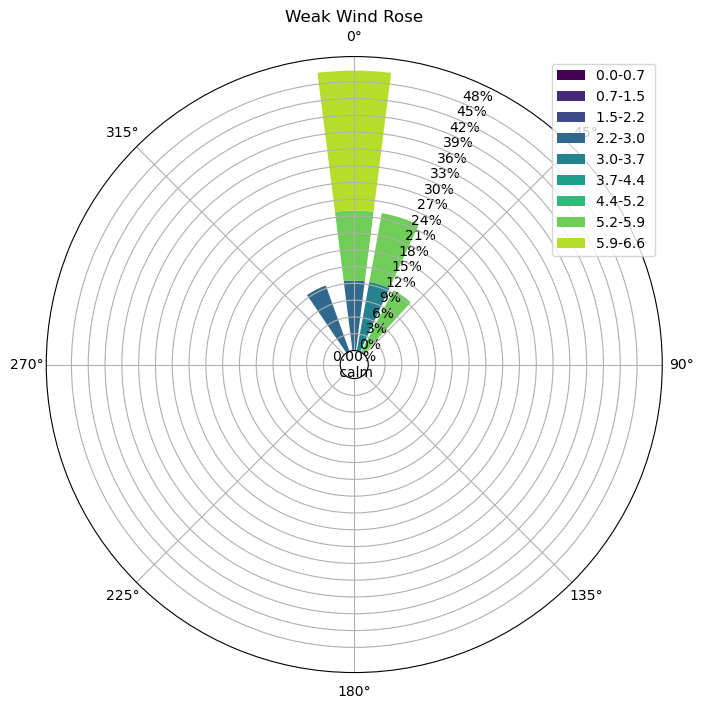

In [125]:
ds = xr.Dataset({'wdir_weak': ("event", wdir_weak), 'wspd_weak':('event',wspd_weak)})
ds
windrose2 = act.plotting.WindRoseDisplay(ds, figsize=(10,8))
windrose2.plot("wdir_weak",'wspd_weak', set_title="Weak Wind Rose")

/opt/conda/lib/python3.11/site-packages/act/plotting/plot.py:81: UserWarning: Could not discern datastreamname and dict or tuple were not provided. Using defaultname of act_datastream!
  warnings.warn(


<PolarAxes: title={'center': 'Strong Wind Rose'}>

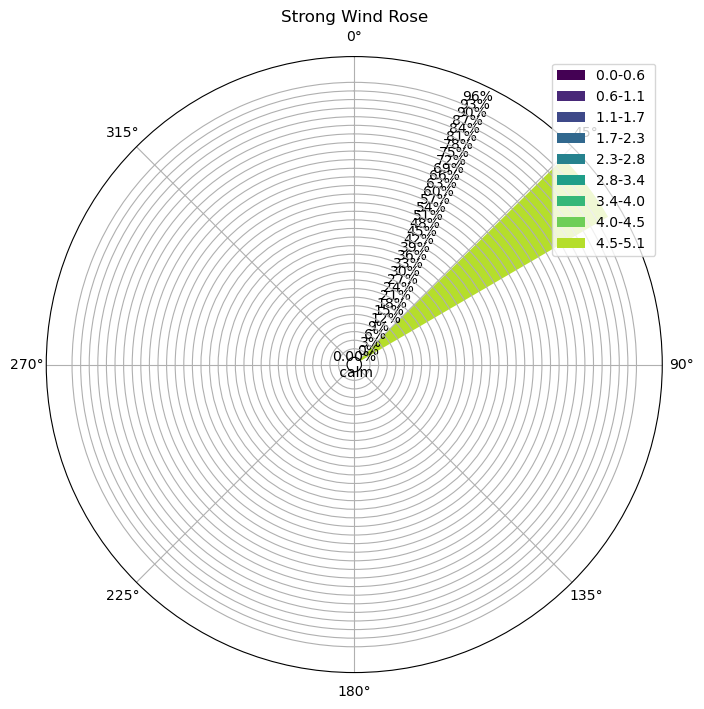

In [126]:
ds = xr.Dataset({'wdir_strong': ("event", wdir_strong), 'wspd_strong':('event',wspd_strong)})
windrose2 = act.plotting.WindRoseDisplay(ds, figsize=(10,8))
windrose2.plot("wdir_strong",'wspd_strong', set_title="Strong Wind Rose")

<PolarAxes: title={'center': 'Total Wind Rose'}>

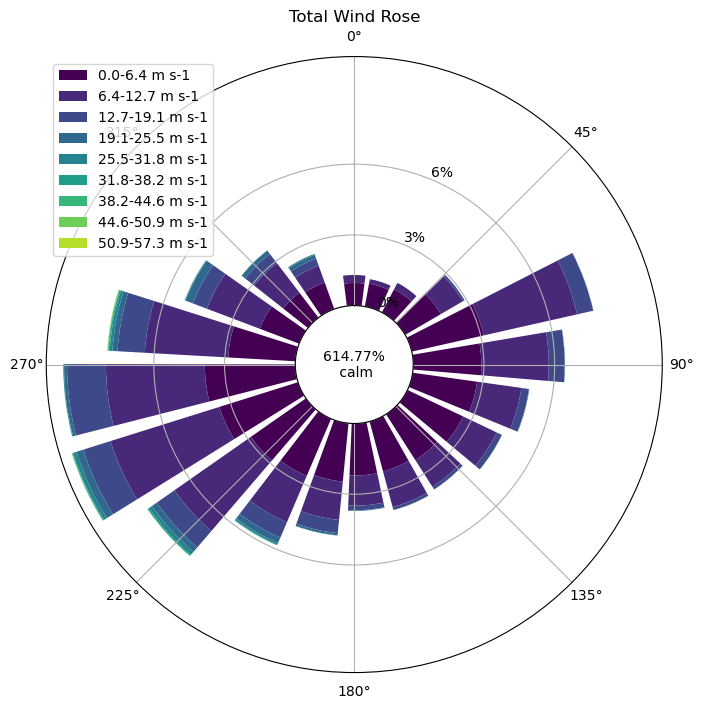

In [129]:
#ds = xr.Dataset({'wdir_total': ("event", wdir), 'wspd_total':('event',wspd)})
windrose2 = act.plotting.WindRoseDisplay(ds, figsize=(10,8))
windrose2.plot("wdir",'wspd', set_title="Total Wind Rose")